# Setup

https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2011JC007531

In [1]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


In [3]:
# # Packages -----------------------------------------------#

# # Data Analysis
# import xarray as xr
# import numpy as np
# import pandas as pd
# import metpy.calc as mpcalc
# import matplotlib.dates as dates
# import os

# # Plotting
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.gridspec as gridspec
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# from scipy.ndimage import gaussian_filter
# from matplotlib.lines import Line2D

# # Timing Processes
# import time

# # make sure the figures plot inline rather than at the end
# %matplotlib inline

# # get data from tigress
# path = '../data/SLA/'
# # infn = 'all_adt_sla_global_twosat_phy_l4_vDT2018_daily_1994_2018_processed.nc'
# infn = 'sla_25km_processed.nc'

# ds_SLA = xr.open_dataset(path + infn)
# ds_SLA

<xarray.Dataset>
Dimensions:             (lat: 200, latitude: 200, lon: 340, longitude: 340, month: 12, month_time: 312, season: 4, season_time: 105, time: 9496)
Coordinates:
  * season_time         (season_time) datetime64[ns] 1993-12-01 ... 2019-12-01
  * longitude           (longitude) float64 35.12 35.38 35.62 ... 119.6 119.9
  * latitude            (latitude) float64 -19.88 -19.62 -19.38 ... 29.62 29.88
  * lon                 (lon) float64 35.12 35.38 35.62 ... 119.4 119.6 119.9
  * lat                 (lat) float64 -19.88 -19.62 -19.38 ... 29.38 29.62 29.88
  * time                (time) datetime64[ns] 1994-01-01 ... 2019-12-31
  * month_time          (month_time) datetime64[ns] 1994-01-01 ... 2019-12-01
  * month               (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * season              (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    daily_sla           (time, lat, lon) float64 ...
    mon_sla             (month_time, lat, lon) float64 ...
    seas_sla          

# Get Data

In [2]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_processed.nc')
ds_SLA

<xarray.Dataset>
Dimensions:           (day_time: 10013, lat: 138, loc_list: 7, lon: 216, month: 12, no_stations: 574, time: 329)
Coordinates:
  * lon               (lon) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat               (lat) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * time              (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * day_time          (day_time) datetime64[ns] 1993-01-01 ... 2020-05-31
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * no_stations       (no_stations) float64 1.0 2.0 3.0 ... 572.0 573.0 574.0
  * loc_list          (loc_list) int64 0 80 201 291 382 491 573
Data variables:
    daily_sla         (day_time, lat, lon) float64 ...
    mon_sla           (time, lat, lon) float64 ...
    mon_sla_mon_clim  (month, lat, lon) float64 ...
    mon_sla_mon_anom  (time, lat, lon) float64 ...
    sta_loninds       (no_stations) int64 ...
    sta_latinds       (no_stations) int64 ...
    sta_lon           (no

In [7]:
# Get data, selecting lat/lon slice
mon_sla = ds_SLA['mon_sla']
mon_sla_mon_anom = ds_SLA['mon_sla_mon_anom']
mon_sla_mon_clim = ds_SLA['mon_sla_mon_clim']
lat = mon_sla.lat.values
lon = mon_sla.lon.values

# Find Coastlines

In [2]:
# # ------------------------------------------------------------#
# # block out a few places that you don't want to include
# # ------------------------------------------------------------#

# mask = mon_sla[0,:,:]
# xx,yy = np.meshgrid(lon,lat)
# # set Gulfs to Nans
# mask = mask.where(~((yy>22) & (xx<59)))
# mask = mask.where(~((yy>10) & (xx<51)))

# # AS inlets
# mask = mask.where(~((yy>21.5) & (yy<23) & (xx>72) & (xx<73)))
# mask = mask.where(~((yy>22.25) & (yy<23) & (xx>69) & (xx<70.5)))
# mask = mask.where(~((yy>23.25) & (yy<24) & (xx>68.5) & (xx<70)))

# # sri lanka are
# mask = mask.where(~((yy>8) & (yy<10.5) & (xx>78) & (xx<80)))

# # Sumatra area
# mask = mask.where(~((yy>4.5) & (yy<5.5) & (xx>95.5) & (xx<100)))
# mask = mask.where(~((yy>3) & (yy<5.5) & (xx>97.5) & (xx<100)))
# mask = mask.where(~((yy>0) & (yy<10) & (xx>99) & (xx<100)))
# mask = mask.where(~((yy>0) & (yy<2.5) & (xx>97) & (xx<98)),1)

# # equator
# mask = mask.where(~(yy<0))
# # ------------------------------------------------------------#
# # locate points along the BoB and AS
# # ------------------------------------------------------------#

# def find_coast(arr):
#     import itertools
    
#     # create empty lists to add row and col info to
#     rowind = []
#     colind = []

#     # create an array of indices
#     rows = np.arange(arr.shape[0])
#     cols = np.arange(arr.shape[1])

#     # find if the sum of a block around a point is a nan (meaning one of the values at least must have been a nan)
#     for row,col in itertools.product(rows,cols):
# #         cond = (~np.isnan(arr[row,col])) & (np.isnan(np.sum(arr[max(0,row-1):min(arr.shape[0],row+2),max(0,col-1):min(arr.shape[1],col+2)])))
#         rowcond = (np.isnan(np.sum(arr[max(0,row-1):min(arr.shape[0],row+2),col])))
#         colcond = (np.isnan(np.sum(arr[row,max(0,col-1):min(arr.shape[1],col+2)])))

# #         if  (~np.isnan(arr[row,col])) & cond):
#         if  (~np.isnan(arr[row,col])) & (rowcond | colcond):
#             rowind.append(rows[row].tolist())
#             colind.append(cols[col].tolist())
    
#     return np.array(rowind), np.array(colind)

# sta_latinds_unord, sta_loninds_unord = find_coast(np.array(mask))
# # ------------------------------------------------------------#
# # Remove Manually some other points
# # ------------------------------------------------------------#

# sta_latinds_unord = sta_latinds_unord[68:]
# sta_loninds_unord = sta_loninds_unord[68:]

# # AS
# lons_from_sta = lon[sta_loninds_unord]
# lats_from_sta = lat[sta_latinds_unord]

# ind = ~((lons_from_sta <52) & (lats_from_sta < 15))
# sta_latinds_unord = sta_latinds_unord[ind]
# sta_loninds_unord = sta_loninds_unord[ind]

# #BoB
# lons_from_sta = lon[sta_loninds_unord]
# lats_from_sta = lat[sta_latinds_unord]

# ind = ~(lons_from_sta >99)
# sta_latinds_unord = sta_latinds_unord[ind]
# sta_loninds_unord = sta_loninds_unord[ind]

# # ------------------------------------------------------------#
# # Plot
# # ------------------------------------------------------------#

# bounds = [40,100,-5,30]

# def add_land(ax,bounds):
#     res = '50m'
#     from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#     land = cfeature.NaturalEarthFeature('physical', 'land', res,
#                                         edgecolor='face',
#                                         facecolor=cfeature.COLORS['land'])
#     ax.add_feature(land,color='gray',zorder = 0)
#     ax.background_patch.set_facecolor('k')
#     ax.coastlines(resolution=res,zorder = 0)
#     g = ax.gridlines(draw_labels=True,alpha=0)
#     g.xlabels_top = False
#     g.ylabels_right = False
#     g.xlabel_style = {'size': 15}
#     g.ylabel_style = {'size': 15}
#     g.xformatter = LONGITUDE_FORMATTER
#     g.yformatter = LATITUDE_FORMATTER
#     ax.axes.axis('tight')
#     ax.set_extent(bounds, crs=ccrs.PlateCarree())
    
# cmin = -0.2
# cmax = 0.2
# levels = np.linspace(cmin, cmax, 10)

# # Start figure
# fig = plt.figure(figsize=(16, 8))
# ax = plt.axes(projection=ccrs.PlateCarree())
# add_land(ax,bounds)
# # cf = ax.contourf(lon, lat,sla_mon_anom[0,:,:],levels = levels,cmap=plt.cm.PuOr_r, extend="both")
# plt.scatter(lon[sta_loninds_unord],lat[sta_latinds_unord],
#             s = 160,c=np.arange(len(sta_latinds_unord)),marker = '.',cmap =plt.cm.PiYG)
# plt.colorbar(label = 'Station No.')
# plt.title('Unordered Stations')

In [3]:
# # ------------------------------------------------------------#
# # put in the right order
# # ------------------------------------------------------------#


# def order_coast(loninds,latinds,sta_zero):
#     # find based on radius
#     zipped_lists = zip(loninds, latinds)
#     sorted_pairs = sorted(zipped_lists, reverse=True)

#     # sort by lon
#     tuples = zip(*sorted_pairs)
#     lon_list,lat_list  = [ list(tuple) for tuple in  tuples]

#     pos = []
#     curr_sta = []
#     rem_sta = sorted_pairs
#     for i in range(len(lon_list)):
# #         print(i)
#         if i == 0:
#             curr_sta.append(sta_zero)
#             rem_sta.remove(sta_zero) 
#             prev_sta = sta_zero
#         else:
#             prev_sta = curr_sta[i-1]

#         start_len = len(curr_sta)
#         for j,(lo, la) in enumerate(rem_sta):
#             next_sta = (rem_sta[j])
            
#             diff = tuple(map(lambda l, k: l - k, curr_sta[i], next_sta))
            
#             # check uplr first
#             if(next_sta != prev_sta) & (all(np.abs(diff) == [0,1])) | (all(np.abs(diff) == [1,0])):
#                 curr_sta.append(next_sta)
#                 rem_sta.remove(next_sta) 
#                 break

#             # then check diagonals
#             elif (next_sta != prev_sta) & (all(np.abs(diff) == [1,1])):
#                 curr_sta.append(next_sta)
#                 rem_sta.remove(next_sta) 
#                 break
                
#         if len(curr_sta) == start_len:
#             print('No Next Station Found. Returning Previous Stations Only.')
#             print(curr_sta[i],rem_sta)
#             break
        
#     sta_lonind, sta_latind  = map(np.array, zip(*curr_sta))
    
#     return sta_lonind, sta_latind

# #initial station
# sta_zero = (sta_loninds_unord[0],sta_latinds_unord[0]) # 98.625, 10.375

# #calculate
# sta_loninds, sta_latinds =order_coast(sta_loninds_unord,sta_latinds_unord,sta_zero)

# # remove the one weird nan

# sta_loninds = np.delete(sta_loninds,164)
# sta_latinds = np.delete(sta_latinds,164)

# # ------------------------------------------------------------#
# # identify first stations for EQ, BOB, and AS
# # ------------------------------------------------------------#

# EQ = 0
# JA = 89-9
# sBoB = 210-9
# mBoB = 300-9
# SL = 390-8
# mAS = 500-9
# eAS = 582-9
# loc_list = [EQ,JA,sBoB,mBoB,SL,mAS,eAS]

# # ------------------------------------------------------------#
# # plot
# # ------------------------------------------------------------#
# bounds = [40,100,-5,30]

# def add_land(ax,bounds):
#     res = '50m'
#     from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#     land = cfeature.NaturalEarthFeature('physical', 'land', res,
#                                         edgecolor='face',
#                                         facecolor=cfeature.COLORS['land'])
#     ax.add_feature(land,color='gray',zorder = 0)
#     ax.background_patch.set_facecolor('k')
#     ax.coastlines(resolution=res,zorder = 0)
#     g = ax.gridlines(draw_labels=True,alpha=0)
#     g.xlabels_top = False
#     g.ylabels_right = False
#     g.xlabel_style = {'size': 15}
#     g.ylabel_style = {'size': 15}
#     g.xformatter = LONGITUDE_FORMATTER
#     g.yformatter = LATITUDE_FORMATTER
#     ax.axes.axis('tight')
#     ax.set_extent(bounds, crs=ccrs.PlateCarree())
    
# cmin = -0.2
# cmax = 0.2
# levels = np.linspace(cmin, cmax, 10)

# # Start figure
# fig = plt.figure(figsize=(16, 8))
# ax = plt.axes(projection=ccrs.PlateCarree())
# add_land(ax,bounds)
# # cf = ax.contourf(lon, lat,sla_mon_anom[0,:,:],levels = levels,cmap=plt.cm.PuOr_r, extend="both")
# # xx,yy = np.meshgrid(lon,lat)
# # plt.scatter(xx.flatten(),yy.flatten(),s = 160,c='w',marker = '.')
# p =plt.scatter(lon[sta_loninds],lat[sta_latinds],
#             s = 160,c=np.arange(len(sta_latinds)),marker = '.',cmap =plt.cm.PiYG) 
# plt.scatter(lon[sta_loninds[loc_list]],lat[sta_latinds[loc_list]],
#             s = 260,c='darkblue',marker = '.')
# plt.colorbar(p,label = 'Station No.')
# plt.title('Ordered Stations')

# plt.savefig('../figures/stations-SLA-25km-along-coast.png', dpi=300, bbox_inches='tight')

In [4]:
# no_stations =np.linspace(1,len(sta_loninds),len(sta_loninds))

# # convert to xarray dataset
# ds_CL=xr.Dataset(coords={'no_stations': no_stations})

# ds_CL['sta_loninds'] = xr.DataArray(sta_loninds,dims = ['no_stations'],coords =[no_stations])
# ds_CL['sta_latinds'] = xr.DataArray(sta_latinds,dims = ['no_stations'],coords =[no_stations])
# ds_CL['loc_list'] = xr.DataArray(loc_list,dims = ['loc_list'],coords =[loc_list])

# ds_CL['sta_lon'] = xr.DataArray(lon[sta_loninds],dims = ['no_stations'],coords =[no_stations])
# ds_CL['sta_lat'] = xr.DataArray(lat[sta_latinds],dims = ['no_stations'],coords =[no_stations])
# ds_CL['loc_list'] = xr.DataArray(loc_list,dims = ['loc_list'],coords =[loc_list])

# outfn = '../data/SLA/sla-coastlines-25km.nc'

# # delete if already present
# if os.path.isfile(outfn):
#     os.remove(outfn)

# ds_CL.to_netcdf(outfn,mode='w',format = "NETCDF4")
# ds_CL

# Group Anomalies Into IOD Phases

In [70]:
# load DMI data
ds_DMI= xr.open_dataset('../data/DMI/dmi_processed.nc')
ds_DMI

# lists of positive iod years for now taken from sources above 1994-2018 unsure after 2016
posIODyears = list(np.array(ds_DMI.pos_IOD_years)) #[1994,1997,2006,2012,2015]
negIODyears = list(np.array(ds_DMI.neg_IOD_years)) #[1996,1998,2001,2010,2014,2016]
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) # [1995,1999,2000,2002,2003,2004,2005,2007,2008,2009,2011,2012,2013]

# # lists of positive iod years for now taken from sources above 1994-2018 unsure after 2016
# posIODyears = list(np.array(ds_DMI.pos_IOD_years[(ds_DMI.pos_IOD_years >= 1994) & (ds_DMI.pos_IOD_years <= 2019)])) #[1994,1997,2006,2012,2015]
# # posIODwENSOyears = ['1997']
# negIODyears = list(np.array(ds_DMI.neg_IOD_years[(ds_DMI.neg_IOD_years >= 1994) & (ds_DMI.neg_IOD_years <= 2019)])) #[1996,1998,2001,2010,2014,2016]
# # negIODwENSOyears = ['1998']
# neuIODyears = list(np.array(ds_DMI.neu_IOD_years[(ds_DMI.neu_IOD_years >= 1994) & (ds_DMI.neu_IOD_years <= 2019)])) # [1995,1999,2000,2002,2003,2004,2005,2007,2008,2009,2011,2012,2013]

In [71]:
# average over the positive IOD years -------------------------------------------# 
mon_data = []
# for ii,year in enumerate(list(np.array(ds_DMI.pos_IOD_years))):
for ii,year in enumerate(posIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom.sel(month_time=time_slice))

# add all the data together
posIOD_mon_sla_mon_anom = xr.concat(mon_data, dim='month_time')
# take the mean for each month of all the years
posIOD_mon_sla_mon_anom = posIOD_mon_sla_mon_anom.groupby('month_time.month').mean(dim='month_time')
#start in march instead of 01
posIOD_mon_sla_mon_anom =posIOD_mon_sla_mon_anom.roll(month=-5,roll_coords = False)

# average over the negative IOD years -------------------------------------------# 
mon_data = []
# for ii,year in enumerate(list(np.array(ds_DMI.neg_IOD_years))):
for ii,year in enumerate(negIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom.sel(month_time=time_slice))
    
negIOD_mon_sla_mon_anom = xr.concat(mon_data, dim='month_time')
negIOD_mon_sla_mon_anom = negIOD_mon_sla_mon_anom.groupby('month_time.month').mean(dim='month_time')
negIOD_mon_sla_mon_anom =negIOD_mon_sla_mon_anom.roll(month=-5,roll_coords = False)

# average over the neutral IOD years -------------------------------------------# 
mon_data = []
# for ii,year in enumerate(list(np.array(ds_DMI.neu_IOD_years))):
for ii,year in enumerate(neuIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom.sel(month_time=time_slice))

neuIOD_mon_sla_mon_anom = xr.concat(mon_data, dim='month_time')
neuIOD_mon_sla_mon_anom = neuIOD_mon_sla_mon_anom.groupby('month_time.month').mean(dim='month_time')
neuIOD_mon_sla_mon_anom = neuIOD_mon_sla_mon_anom.roll(month=-5,roll_coords = False)


# Annual Cycle starting in June
rolled_ann_cyc = sla_mon_clim.roll(month=-5,roll_coords = False)

/home/jennap/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


# Hovmueller Diagrams for 0.25 Degree

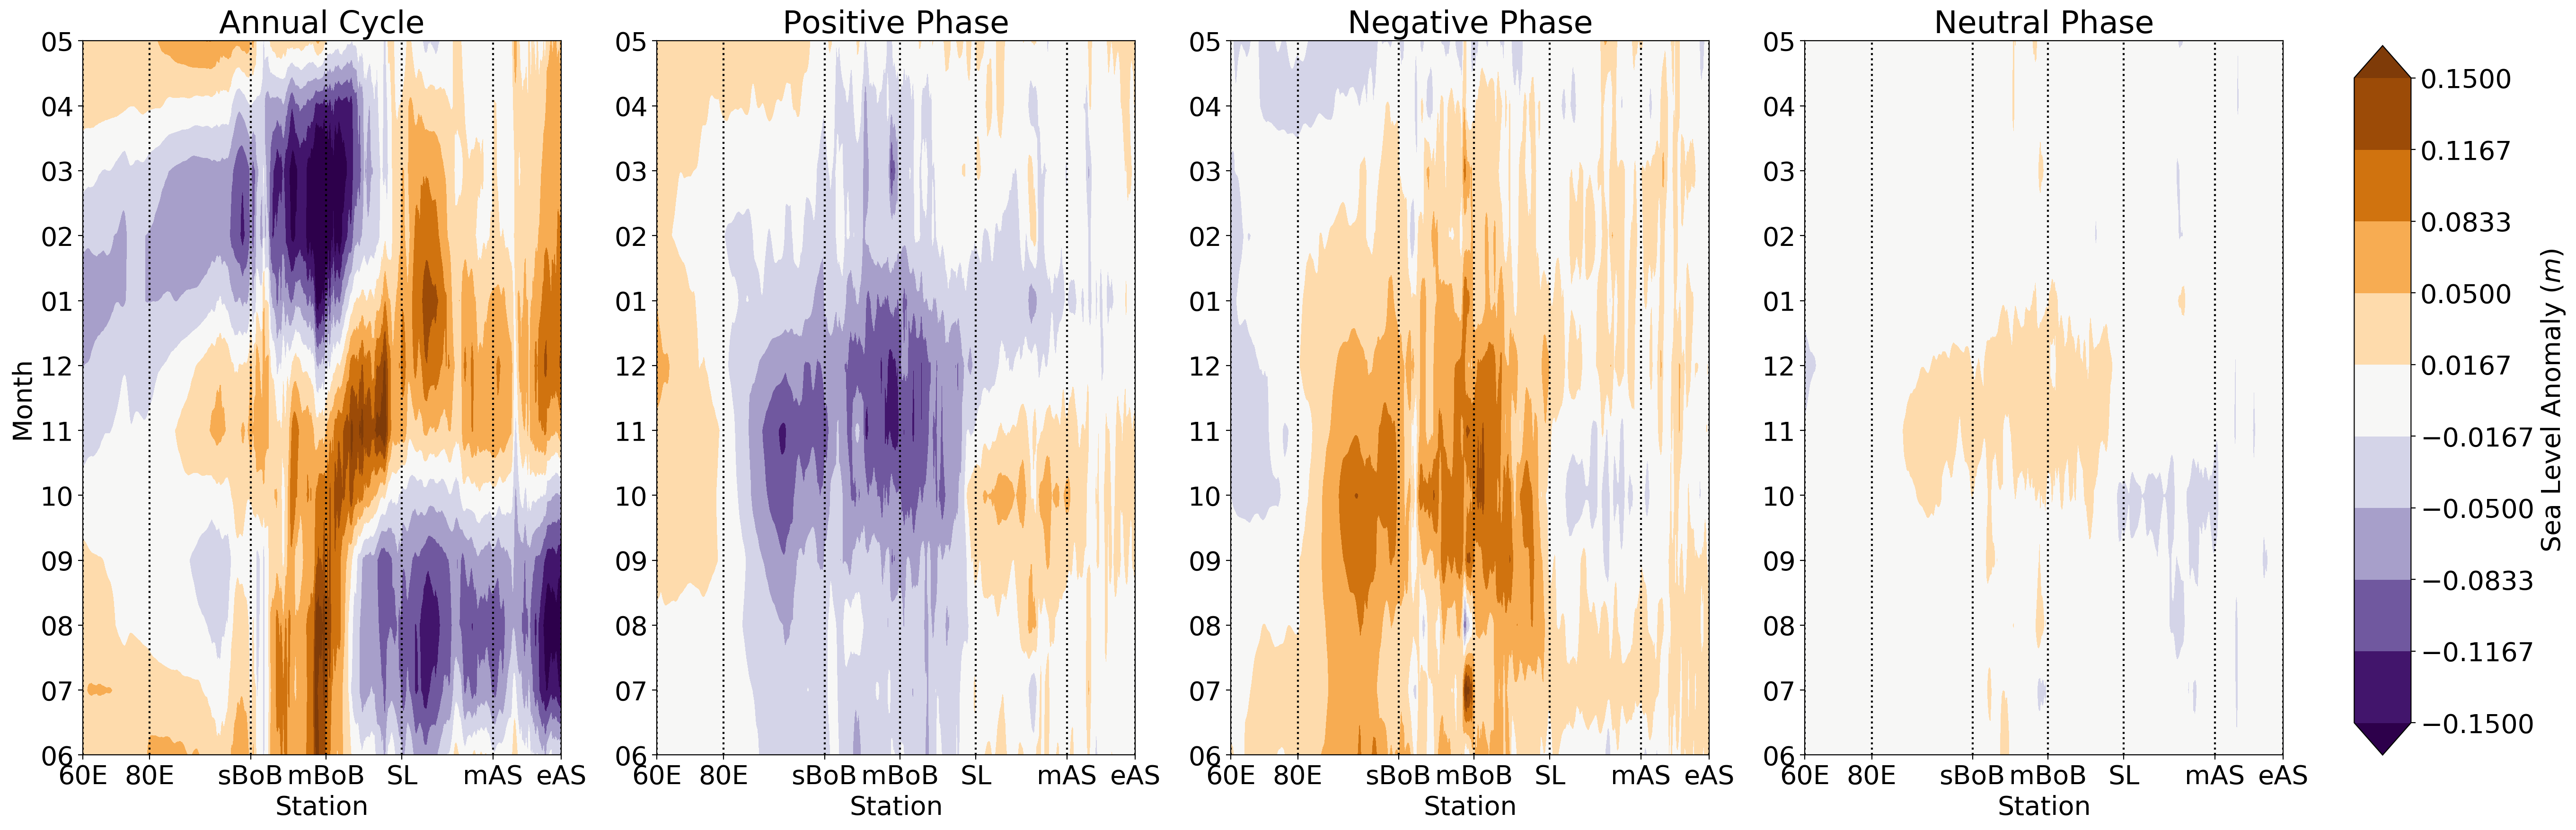

In [72]:
# create list of integer years
IODphases = list([rolled_ann_cyc,posIOD_mon_sla_mon_anom,negIOD_mon_sla_mon_anom,neuIOD_mon_sla_mon_anom])
titles = ['Annual Cycle','Positive Phase','Negative Phase', 'Neutral Phase']
plt.rcParams.update({'font.size': 20})

cmin = -0.15
cmax = 0.15

fig = plt.figure(figsize=(30, 10), dpi =200)
for ii,phase in enumerate(IODphases):
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
#     print(data.shape)
    for jj in range(sta_loninds.shape[0]):
        data[:,jj] = phase[:,sta_latinds[jj],sta_loninds[jj]]
#         ac[:,jj] = rolled_ann_cyc[:,sta_latinds[jj],sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(sta_loninds))

    ax = fig.add_subplot(1,4,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    
    for loc in loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(loc_list)
    ax.set_xticklabels(['60E','80E', 'sBoB','mBoB', 'SL', 'mAS','eAS'])
    ax.set_yticks(list(np.arange(1,13)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)')

plt.savefig('../figures/seasonal-and-IOD-years-SLA-along-coast-0-25-degree.png', dpi=300, bbox_inches='tight')



In [68]:
# singular plots 
# create list of integer years
rolled_ann_cyc = sla_mon_clim_dtrnd.roll(month=-5,roll_coords = False)
IODphases = list([rolled_ann_cyc,posIOD_mon_sla_mon_anom_dtrnd,negIOD_mon_sla_mon_anom_dtrnd,neuIOD_mon_sla_mon_anom_dtrnd])
titles = ['Annual Cycle','Positive Phase','Negative Phase', 'Neutral Phase']
titles_save = ['annual-cycle','positive-phase','negative-phase', 'neutral-phase']
plt.rcParams.update({'font.size': 20})

cmin = -0.15
cmax = 0.15

for ii,phase in enumerate(IODphases):
    
    fig = plt.figure(figsize=(14, 18))
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    ac = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    
    for jj in range(sta_loninds.shape[0]):
        data[:,jj] = phase[:,sta_latinds[jj],sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(sta_loninds))

    ax = fig.add_subplot(1,1,1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    
    for loc in loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(loc_list)
    ax.set_xticklabels(['60E','80E', 'sBoB','mBoB', 'SL', 'mAS','eAS'])
    ax.set_yticks(list(np.arange(1,13)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

    cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
    cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
    cbar.set_label('Interannual Sea Level Anomaly ($m$)')




NameError: name 'sla_mon_clim_dtrnd' is not defined

# Enhance/supress Seasonal Cycle

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less_equal


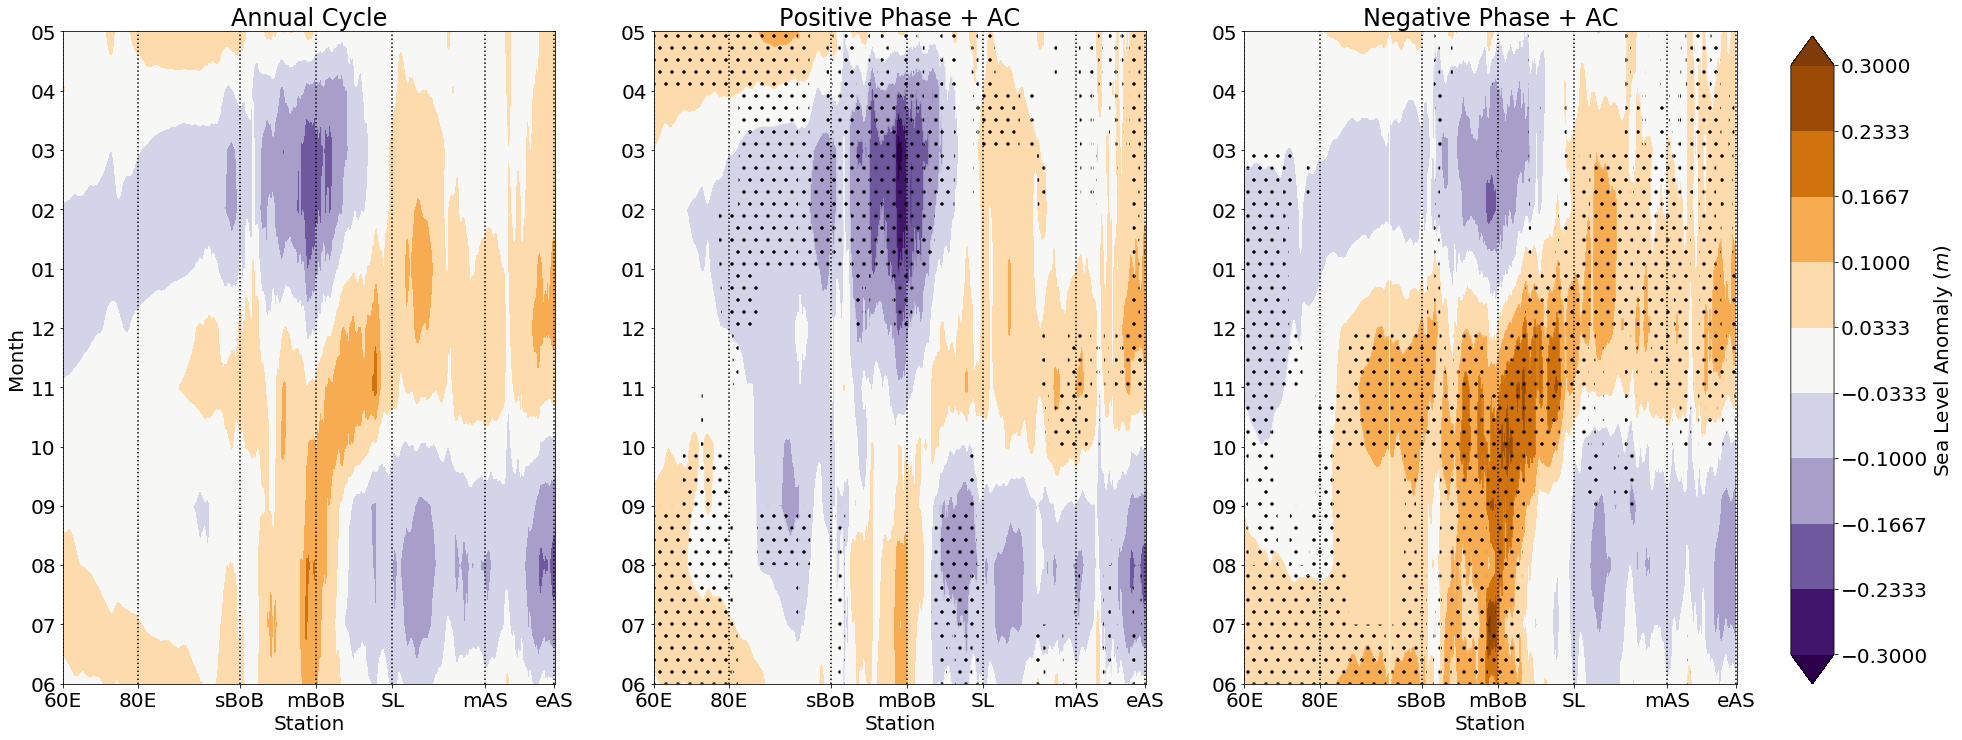

In [78]:
# create list of integer years
rolled_ann_cyc = sla_mon_clim_dtrnd.roll(month=-5,roll_coords = False)
IODphases = list([rolled_ann_cyc,posIOD_mon_sla_mon_anom_dtrnd,negIOD_mon_sla_mon_anom_dtrnd])
titles = ['Annual Cycle','Positive Phase + AC','Negative Phase + AC', 'Neutral Phase + AC']
plt.rcParams.update({'font.size': 20})

cmin = -0.3
cmax = 0.3

fig = plt.figure(figsize=(30, 12))
for ii,phase in enumerate(IODphases):
    
    if ii == 0:
        var = rolled_ann_cyc
    else:
        var = rolled_ann_cyc + phase
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    ac = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    ph = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    
#     print(data.shape)
    for jj in range(sta_loninds.shape[0]):
        data[:,jj] = var[:,sta_latinds[jj],sta_loninds[jj]]
        ac[:,jj] = rolled_ann_cyc[:,sta_latinds[jj],sta_loninds[jj]]
        ph[:,jj] = phase[:,sta_latinds[jj],sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(sta_loninds))

    ax = fig.add_subplot(1,3,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    ss = np.ma.array(data, mask= np.sign(ac) * np.sign(ph)<=0) # maintains opposite condition
#     os = np.ma.array(data, mask= np.sign(ac) * np.sign(ph)>0)
    
    if ii >0:
        css = ax.contourf(sta,vtimes,ss,levels = levels,cmap=plt.cm.PuOr_r,
                          extend="both", hatches=['.'], alpha=0.5)
#         cos = ax.contourf(sta,vtimes,os,levels = levels,cmap=plt.cm.PuOr_r,
#                           extend="both", hatches=['/'], alpha=0.5)
#         xsta, ytime = np.meshgrid(sta,vtimes)
#         xsta = np.ma.array(xsta, mask= ((np.sign(ac) * np.sign(ph)<=0) | (ph == np.nan)))
#         ytime = np.ma.array(ytime, mask= ((np.sign(ac) * np.sign(ph)<=0) | (ph == np.nan)))
#         plt.scatter(xsta.flatten(),ytime.flatten(), marker = '.', c = 'k', s = 10)
    
    for loc in loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(loc_list)
    ax.set_xticklabels(['60E','80E', 'sBoB','mBoB', 'SL', 'mAS','eAS'])
    ax.set_yticks(list(np.arange(1,13)))
    plt.xlim(0,len(sta))
    plt.ylim(1,12)
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)')

plt.savefig('../figures/seasonal-and-IOD-years-add-SLA-along-coast-0-25-degree.png', dpi=200, bbox_inches='tight')




In [72]:
np.nan < 0 

False

In [46]:
ph[10,1:40]

array([-0.01107151, -0.01056994, -0.01029451, -0.01025856, -0.01047508,
       -0.01099172, -0.01163411, -0.01238229, -0.01327215, -0.01421468,
       -0.01507147, -0.01573991, -0.01608817, -0.01607399, -0.01574316,
       -0.01517975, -0.0146555 , -0.01427993, -0.01374816, -0.01301172,
       -0.01228988, -0.01155634, -0.01062459, -0.00959197, -0.0091474 ,
       -0.00934552, -0.00932779, -0.00906602, -0.00895329, -0.00892624,
       -0.00893918, -0.00899136, -0.0090624 , -0.00918122, -0.00945219,
       -0.00994241, -0.01078182, -0.01199172, -0.01320684])

In [47]:
ss[10,1:40]

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

# Weak and Strong IOD Event

In [9]:
sposIODyears = [1994,1997,2006,2019]
wposIODyears = [2012, 2015, 2018]

# average over the strong positive IOD years -------------------------------------------# 
daily_data = []
mon_data = []
mon_clim = []
# for ii,year in enumerate(list(np.array(ds_DMI.pos_IOD_years))):
for ii,year in enumerate(sposIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom.sel(month_time=time_slice))

# add all the data together
sposIOD_mon_sla_mon_anom= xr.concat(mon_data, dim='month_time')
# take the mean for each month of all the years
sposIOD_mon_sla_mon_anom = sposIOD_mon_sla_mon_anom.groupby('month_time.month').mean(dim='month_time')
#start in march instead of 01
sposIOD_mon_sla_mon_anom = sposIOD_mon_sla_mon_anom.roll(month=-5,roll_coords = False)

# average over the weak positive IOD years -------------------------------------------# 
daily_data = []
mon_data = []
mon_clim = []
# for ii,year in enumerate(list(np.array(ds_DMI.pos_IOD_years))):
for ii,year in enumerate(wposIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom_dtrnd.sel(month_time=time_slice))

# add all the data together
wposIOD_mon_sla_mon_anom_dtrnd = xr.concat(mon_data, dim='month_time')
# take the mean for each month of all the years
wposIOD_mon_sla_mon_anom_dtrnd = wposIOD_mon_sla_mon_anom_dtrnd.groupby('month_time.month').mean(dim='month_time')
#start in march instead of 01
wposIOD_mon_sla_mon_anom_dtrnd = wposIOD_mon_sla_mon_anom_dtrnd.roll(month=-5,roll_coords = False)


snegIODyears = [1996]
wnegIODyears = [1996,1998,2016]


# average over the strong negative IOD years -------------------------------------------# 
daily_data = []
mon_data = []
mon_clim = []
# for ii,year in enumerate(list(np.array(ds_DMI.pos_IOD_years))):
for ii,year in enumerate(snegIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom_dtrnd.sel(month_time=time_slice))

# add all the data together
snegIOD_mon_sla_mon_anom_dtrnd = xr.concat(mon_data, dim='month_time')
# take the mean for each month of all the years
snegIOD_mon_sla_mon_anom_dtrnd = snegIOD_mon_sla_mon_anom_dtrnd.groupby('month_time.month').mean(dim='month_time')
#start in march instead of 01
snegIOD_mon_sla_mon_anom_dtrnd = snegIOD_mon_sla_mon_anom_dtrnd.roll(month=-5,roll_coords = False)

# average over the weak negative IOD years -------------------------------------------# 
daily_data = []
mon_data = []
mon_clim = []
# for ii,year in enumerate(list(np.array(ds_DMI.pos_IOD_years))):
for ii,year in enumerate(wnegIODyears):
    start_time = str(year) + '-06-01'
    end_time = str(year+1) + '-05-31'
    time_slice = slice(start_time, end_time)
    mon_data.append(mon_sla_mon_anom_dtrnd.sel(month_time=time_slice))

# add all the data together
wnegIOD_mon_sla_mon_anom_dtrnd = xr.concat(mon_data, dim='month_time')
# take the mean for each month of all the years
wnegIOD_mon_sla_mon_anom_dtrnd = wnegIOD_mon_sla_mon_anom_dtrnd.groupby('month_time.month').mean(dim='month_time')
#start in march instead of 01
wnegIOD_mon_sla_mon_anom_dtrnd = wnegIOD_mon_sla_mon_anom_dtrnd.roll(month=-5,roll_coords = False)

NameError: name 'mon_sla_mon_anom_dtrnd' is not defined

In [10]:
# create list of integer years
IODphases = list([sposIOD_mon_sla_mon_anom_dtrnd,snegIOD_mon_sla_mon_anom_dtrnd,
                 wposIOD_mon_sla_mon_anom_dtrnd,wnegIOD_mon_sla_mon_anom_dtrnd])
titles = ['Strong Positive Phase',' Strong Negative Phase','Weak Positive Phase',' Weak Negative Phase']
plt.rcParams.update({'font.size': 20})

cmin = -0.15
cmax = 0.15

fig = plt.figure(figsize=(20, 20))
for ii,phase in enumerate(IODphases):
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
#     print(data.shape)
    for jj in range(sta_loninds.shape[0]):
        data[:,jj] = phase[:,sta_latinds[jj],sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(sta_loninds))

    ax = fig.add_subplot(2,2,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    for loc in loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(loc_list)
    ax.set_xticklabels(['60E','80E', 'sBoB','mBoB', 'SL', 'mAS','eAS'])
    ax.set_yticks(list(np.arange(1,13)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)')

plt.savefig('../figures/strong-and-weak-IOD-years-SLA-along-coast.png', dpi=200, bbox_inches='tight')


NameError: name 'sposIOD_mon_sla_mon_anom_dtrnd' is not defined

In [11]:
# create list of integer years
IODphases = list([rolled_ann_cyc,sposIOD_mon_sla_mon_anom_dtrnd,snegIOD_mon_sla_mon_anom_dtrnd])
titles = ['Annual Cycle','Strong Positive Phase + AC',' Strong Negative Phase + AC']
plt.rcParams.update({'font.size': 20})

cmin = -0.3
cmax = 0.3

fig = plt.figure(figsize=(30, 12))
for ii,phase in enumerate(IODphases):
    
    if ii == 0:
        var = rolled_ann_cyc
    else:
        var = rolled_ann_cyc + phase
        
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
#     print(data.shape)
    for jj in range(sta_loninds.shape[0]):
        data[:,jj] = var[:,sta_latinds[jj],sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(sta_loninds))

    ax = fig.add_subplot(1,3,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    for loc in loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(loc_list)
    ax.set_xticklabels(['60E','80E', 'sBoB','mBoB', 'SL', 'mAS','eAS'])
    ax.set_yticks(list(np.arange(1,13)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)')

plt.savefig('../figures/strong-and-weak-IOD-years-add-SLA-along-coast.png', dpi=200, bbox_inches='tight')



NameError: name 'sposIOD_mon_sla_mon_anom_dtrnd' is not defined

In [12]:
# create list of integer years
IODphases = list([rolled_ann_cyc,sposIOD_mon_sla_mon_anom_dtrnd,snegIOD_mon_sla_mon_anom_dtrnd])
titles = ['Annual Cycle','Strong Positive Phase + AC',' Strong Negative Phase + AC']
plt.rcParams.update({'font.size': 20})

cmin = -0.3
cmax = 0.3

fig = plt.figure(figsize=(30, 12))
for ii,phase in enumerate(IODphases):
    
    if ii == 0:
        var = rolled_ann_cyc
    else:
        var = rolled_ann_cyc + phase
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    ac = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    ph = np.zeros([vtimes.shape[0],sta_loninds.shape[0]])
    
#     print(data.shape)
    for jj in range(sta_loninds.shape[0]):
        data[:,jj] = var[:,sta_latinds[jj],sta_loninds[jj]]
        ac[:,jj] = rolled_ann_cyc[:,sta_latinds[jj],sta_loninds[jj]]
        ph[:,jj] = phase[:,sta_latinds[jj],sta_loninds[jj]]

    # colorbar limits
    levels = np.linspace(cmin, cmax, 10)

    # Specify longitude values for chosen domain
    sta = np.arange(len(sta_loninds))

    ax = fig.add_subplot(1,3,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    ss = np.ma.array(data, mask= np.sign(ac) * np.sign(ph)<=0) # maintains opposite condition
#     os = np.ma.array(data, mask= np.sign(ac) * np.sign(ph)>0)
    
    if ii >0:
        css = ax.contourf(sta,vtimes,ss,levels = levels,cmap=plt.cm.PuOr_r,
                          extend="both", hatches=['.'], alpha=0.5)
#         cos = ax.contourf(sta,vtimes,os,levels = levels,cmap=plt.cm.PuOr_r,
#                           extend="both", hatches=['/'], alpha=0.5)
#         xsta, ytime = np.meshgrid(sta,vtimes)
#         xsta = np.ma.array(xsta, mask= ((np.sign(ac) * np.sign(ph)<=0) | (ph == np.nan)))
#         ytime = np.ma.array(ytime, mask= ((np.sign(ac) * np.sign(ph)<=0) | (ph == np.nan)))
#         plt.scatter(xsta.flatten(),ytime.flatten(), marker = '.', c = 'k', s = 10)
    
    for loc in loc_list:
        plt.axvline(x=loc,color = 'k',linestyle = ':')
        
    plt.xlabel('Station')
    if ii == 0:
        plt.ylabel('Month')
    
    plt.title(titles[ii])
    ax.set_yticklabels(['06','07','08','09','10','11','12','01','02','03', '04', '05'])
    ax.set_xticks(loc_list)
    ax.set_xticklabels(['60E','80E', 'sBoB','mBoB', 'SL', 'mAS','eAS'])
    ax.set_yticks(list(np.arange(1,13)))
    plt.xlim(0,len(sta))
    plt.ylim(1,12)
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Sea Level Anomaly ($m$)')

plt.savefig('../figures/seasonal-and-IOD-years-add-SLA-along-coast-0-25-degree.png', dpi=200, bbox_inches='tight')





NameError: name 'sposIOD_mon_sla_mon_anom_dtrnd' is not defined

# Seasonal Cycle

In [13]:
ds_SLA.sla_seas_clim_dtrnd.season

<xarray.DataArray 'season' (season: 4)>
array(['DJF', 'JJA', 'MAM', 'SON'], dtype=object)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

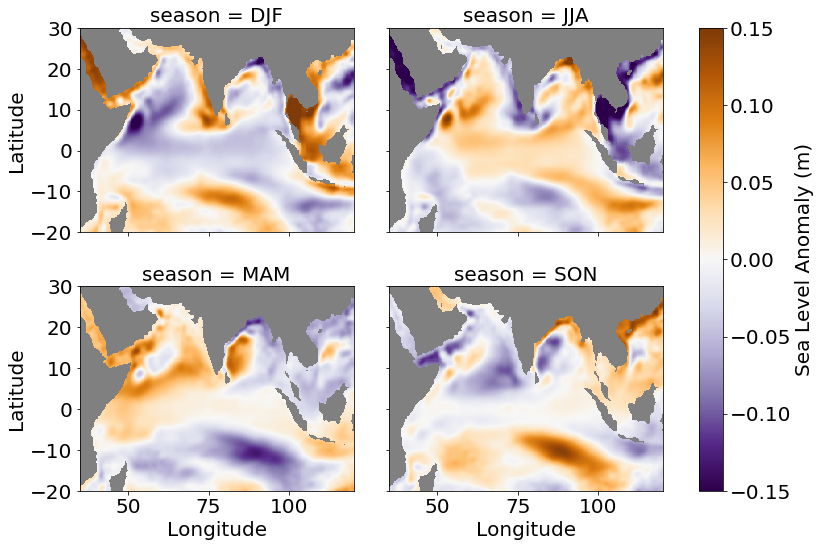

In [14]:
seasona = ['JJA','MAM','SON','DJF']

rolled_seas_cycle = ds_SLA.sla_seas_clim_dtrnd.roll(season=-1,roll_coords = False)
p = ds_SLA.sla_seas_clim_dtrnd.plot.pcolormesh(x="longitude", y="latitude", col="season", col_wrap=2,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 8),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
#     ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')
plt.savefig('../figures/seasonal-cycle-SLA.png', dpi=300, bbox_inches='tight')

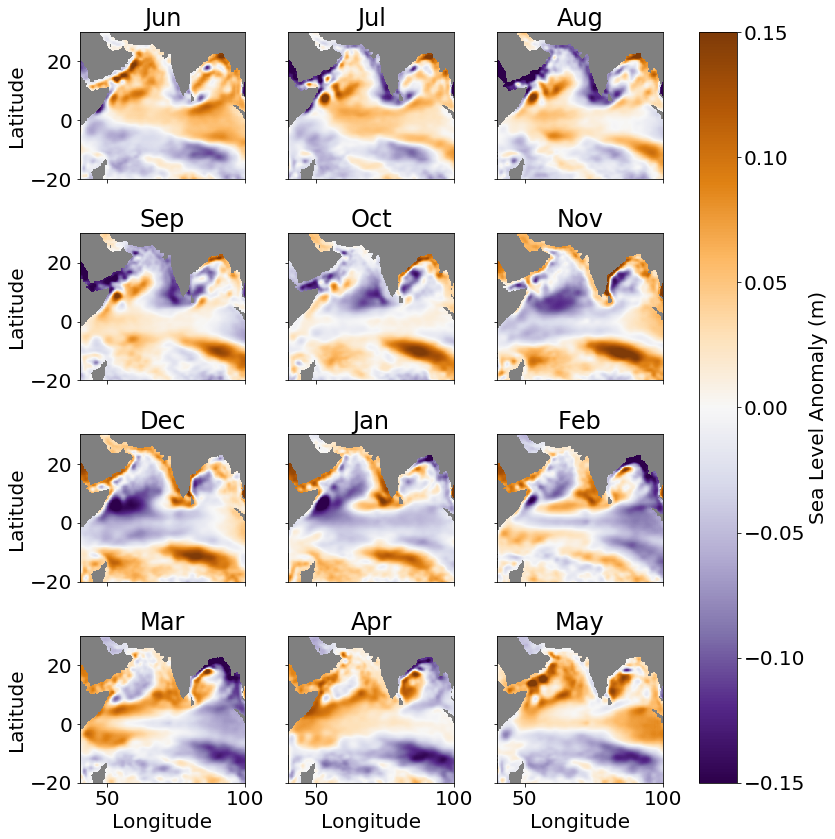

In [15]:
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May']

p = rolled_ann_cyc.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')
plt.savefig('../figures/annual-cycle-SLA.png', dpi=300, bbox_inches='tight')

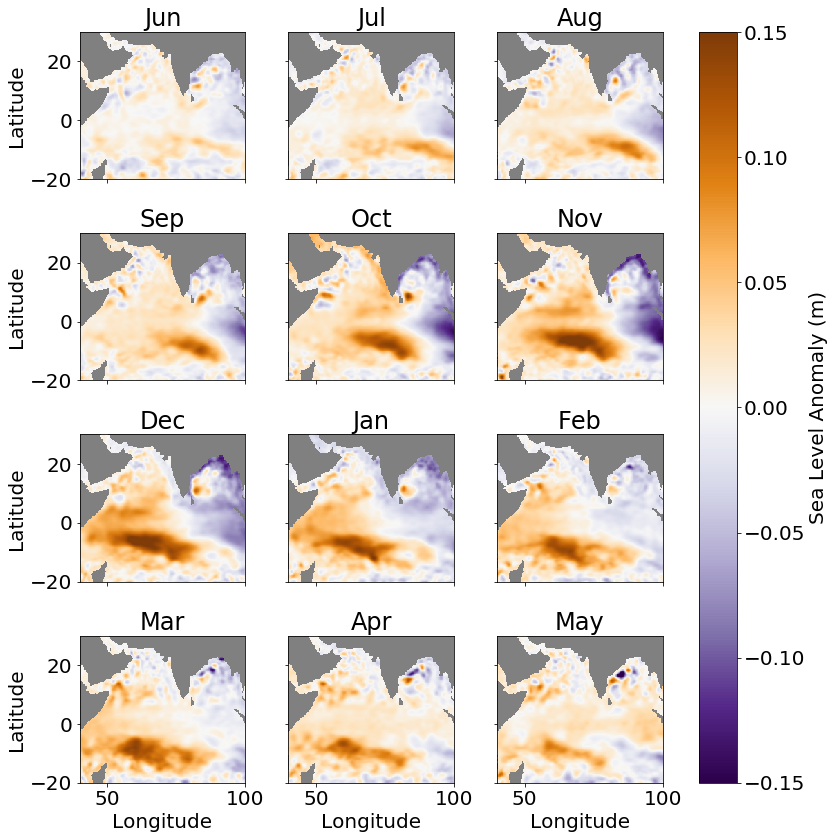

In [16]:
# posIOD
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May']

p = posIOD_mon_sla_mon_anom_dtrnd.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

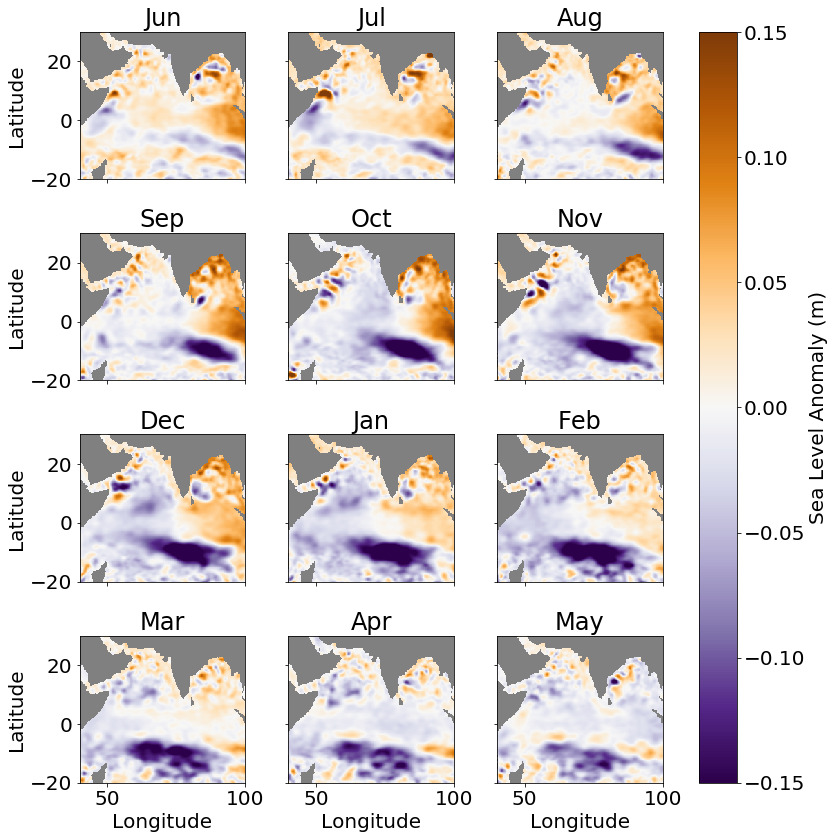

In [17]:
# negIOD
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May',]

p = negIOD_mon_sla_mon_anom_dtrnd.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

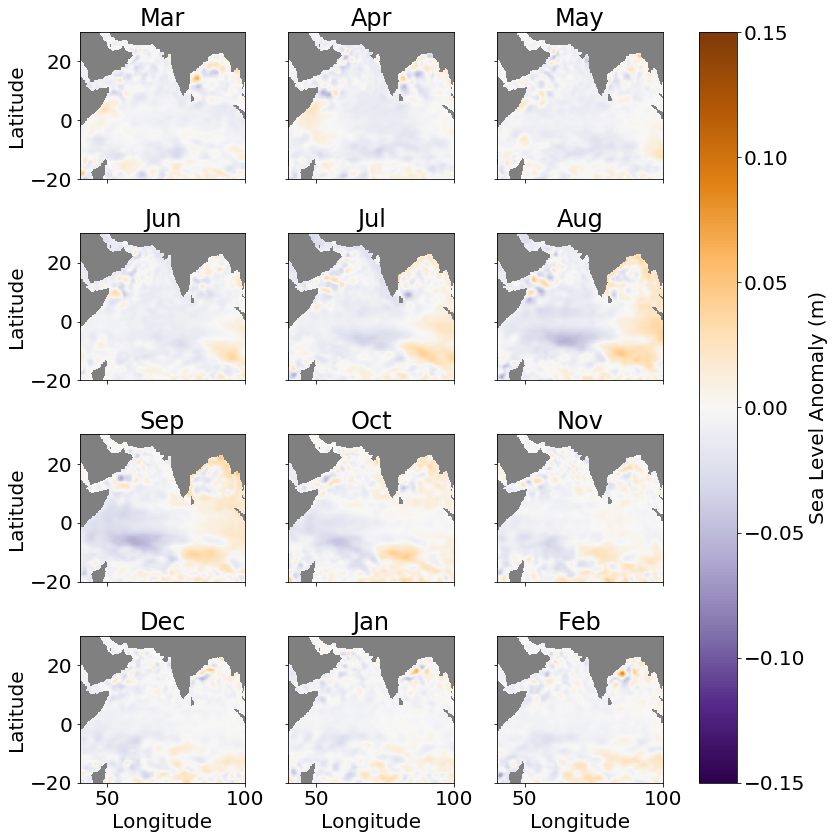

In [18]:
# neuIOD
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb']

p = neuIOD_mon_sla_mon_anom_dtrnd.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

# Differences between annual cycle and positive IOD years

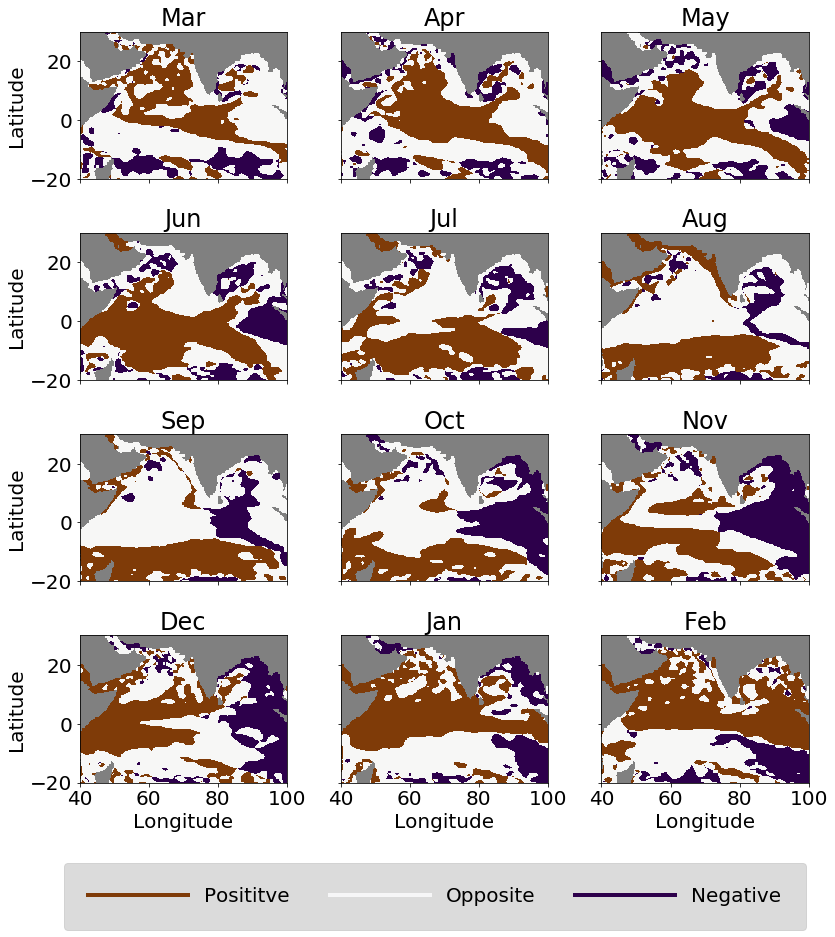

In [19]:
# posIOD

var = np.sign(posIOD_mon_sla_mon_anom_dtrnd) + np.sign(rolled_ann_cyc)
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb']

p = var.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        add_colorbar=False,
                                        vmax=1,vmin=-1, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
#                                         cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

cmap=plt.cm.PuOr

custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

# ax.legend(custom_lines, ['Posititve', 'Opposite', 'Negative'],bbox_to_anchor=(-.7, -0.5), loc='center',
#          ncol = 3,handlelength=5, borderpad=1.2, labelspacing=1.2)
leg = ax.legend(custom_lines, ['Posititve', 'Opposite', 'Negative'],loc='center',
          bbox_to_anchor = (0.02,-0.55,1,1),bbox_transform = plt.gcf().transFigure,
          ncol = 3,handlelength=5, borderpad=1.2, labelspacing=1.2)
frame = leg.get_frame()
frame.set_facecolor('lightgray')

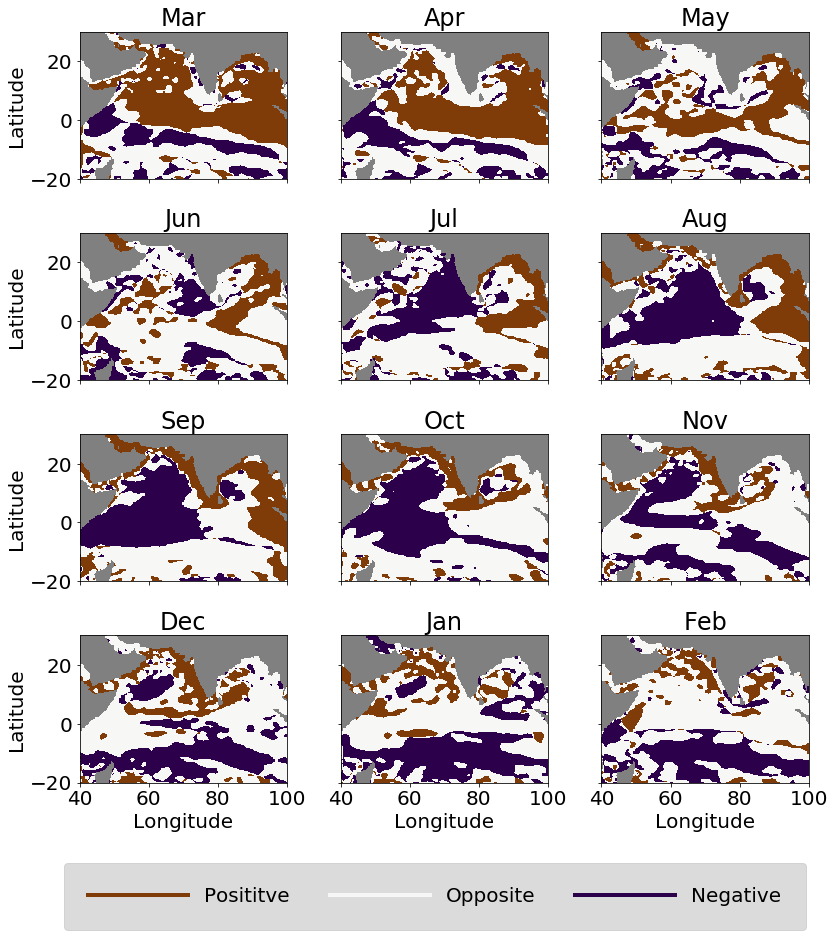

In [20]:
# negIOD

var = np.sign(negIOD_mon_sla_mon_anom_dtrnd) + np.sign(rolled_ann_cyc)
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb']

p = var.plot.pcolormesh(x="longitude", y="latitude", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        add_colorbar=False,
                                        vmax=1,vmin=-1, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
#                                         cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

cmap=plt.cm.PuOr

custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

# ax.legend(custom_lines, ['Posititve', 'Opposite', 'Negative'],bbox_to_anchor=(-.7, -0.5), loc='center',
#          ncol = 3,handlelength=5, borderpad=1.2, labelspacing=1.2)
leg = ax.legend(custom_lines, ['Posititve', 'Opposite', 'Negative'],loc='center',
          bbox_to_anchor = (0.02,-0.55,1,1),bbox_transform = plt.gcf().transFigure,
          ncol = 3,handlelength=5, borderpad=1.2, labelspacing=1.2)
frame = leg.get_frame()
frame.set_facecolor('lightgray')

In [21]:
# manually remove some points

# remove lower boundary (about 10N)
loninds = loninds[latinds>120]
latinds = latinds[latinds>120]

BoB_latinds = latinds
BoB_loninds = loninds

BoB_latinds = BoB_latinds[(BoB_loninds>195) & (BoB_loninds<276)]
BoB_loninds = BoB_loninds[(BoB_loninds>195) & (BoB_loninds<276)]
    
AS_latinds = latinds
AS_loninds = loninds

AS_latinds = AS_latinds[(AS_loninds>119) & (AS_loninds<195)]
AS_loninds = AS_loninds[(AS_loninds>119) & (AS_loninds<195)]

# EQ_latinds
# EQ_loninds

NameError: name 'loninds' is not defined

In [ ]:
#BoB

BoB_sta_zero = (274,121) # 98.625, 10.375
BoB_sta_lonind, BoB_sta_latind =order_coast_BoB(BoB_loninds,BoB_latinds,BoB_sta_zero)

In [ ]:
#AS
# take first piece
AS_sta_zero = (184,121) # 76.125, 10.375
AS_sta_lonind, AS_sta_latind =order_coast_AS(AS_loninds,AS_latinds,AS_sta_zero)
AS_sta_lonind = AS_sta_lonind[:-8]
AS_sta_latind = AS_sta_latind[:-8]

In [ ]:
# get data from tigress
path = '/home/jennap/projects/LRGROUP/shared_data/IOD_index/'
infn = 'dmi_updated_10_07_2020.nc'

dmi_ds = xr.open_dataset(path + infn)

https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2007JD009151
http://www.bom.gov.au/climate/iod/

In [ ]:
var = sla_mon_clim_mon

# average over the positive IOD years
data = []
for ii,year in enumerate(posIODyears):
    start_time = year +'-01-01'
    end_time = year+'-12-31'
    time_slice = slice(start_time, end_time)
    data.append(var.sel(time=time_slice))
combined = xr.concat(data, dim='time')
posIODdata = combined.groupby('time.month').mean(dim='time')


# average over the negative IOD years
data = []
for ii,year in enumerate(negIODyears):
    start_time = year +'-01-01'
    end_time = year+'-12-31'
    time_slice = slice(start_time, end_time)
    data.append(var.sel(time=time_slice))
combined = xr.concat(data, dim='time')
negIODdata = combined.groupby('time.month').mean(dim='time')



# average over the neutral IOD years
data = []
for ii,year in enumerate(neuIODyears):
    start_time = year +'-01-01'
    end_time = year+'-12-31'
    time_slice = slice(start_time, end_time)
    data.append(var.sel(time=time_slice))
combined = xr.concat(data, dim='time')
neuIODdata = combined.groupby('time.month').mean(dim='time')

